# User guide: top-view experiments
The following example is to analyse a single-file movement experiment recorded using a top-view camera which records the entire experiment. 

Example (top-view camera):
[School GymBay, main circle.](https://doi.org/10.34735/ped.2014.4)

![gymbaymain](https://user-images.githubusercontent.com/4458692/197472324-e9e65cb2-3468-40f2-b7a3-a79d1d71868c.png)

### Read the trajectories
Import the required libraries:

In [15]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'helper'))+'/')
from experiments import EXPERIMENTS
from helper import process_data

from typing import List
import numpy as np
import numpy.typing as npt
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

define the following arguments related to the experiment and experimental data:

In [16]:
# the path to the folder containing the data
path="/home/rudinasbaih/Documents/SingleFileMovementAnalysis/demos/top_view_exp/01_schoolGymBay_mainCircle_germany/traj/00_raw" 
# the key of the experiment (object from class data) that stores the experiment attributes important for transformation and analysis
exp_key="schoolGymBayMainCircle_germany_Wang" 
# the name of the data file
files=["GymBay_main_15_1.txt"]

the trajectory data file contains the following columns:

[[ 1.0000e+00  0.0000e+00 -1.9910e+00  1.4597e+00  1.6160e+00]
 [ 1.0000e+00  1.0000e+00 -1.9911e+00  1.4649e+00  1.6160e+00]
 [ 1.0000e+00  2.0000e+00 -1.9909e+00  1.4702e+00  1.6160e+00]
 ...
 [ 1.5000e+01  2.0280e+03  1.0429e+00 -3.4747e+00  1.8990e+00]
 [ 1.5000e+01  2.0290e+03  1.0429e+00 -3.4746e+00  1.8990e+00]
 [ 1.5000e+01  2.0300e+03  1.0430e+00 -3.4748e+00  1.8990e+00]]


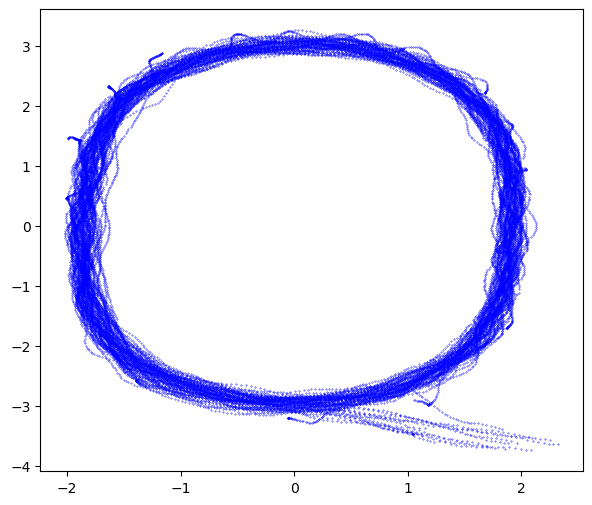

In [17]:
for file in files:
    file_name = os.path.splitext(file)[0]
    file_type = os.path.splitext(file)[1]  # extension of the data file
    # format of the file
    if file_type == ".sqlite":
        data = read_sqlite_file(path, file)
        data = data.to_numpy()  # fr, pedID, x, y, ori_x, ori_y
    else:
        e = EXPERIMENTS[exp_key]
        data = np.loadtxt("%s/%s" % (path, file), skiprows=1, delimiter=e.delimiter)
    
    print(data)

    # plot the raw trajectories
    fig = plt.figure(figsize=(7, 6))
    plt.plot(data[:, 2], data[:, 3], "bo", markersize=0.3)

### Apply the transformation additional:

[[ 1.0000e+00  0.0000e+00 -7.4100e-01  3.9030e-01  1.6160e+00]
 [ 1.0000e+00  1.0000e+00 -7.4110e-01  3.8510e-01  1.6160e+00]
 [ 1.0000e+00  2.0000e+00 -7.4090e-01  3.7980e-01  1.6160e+00]
 ...
 [ 1.5000e+01  2.0280e+03  2.2929e+00  5.3247e+00  1.8990e+00]
 [ 1.5000e+01  2.0290e+03  2.2929e+00  5.3246e+00  1.8990e+00]
 [ 1.5000e+01  2.0300e+03  2.2930e+00  5.3248e+00  1.8990e+00]]


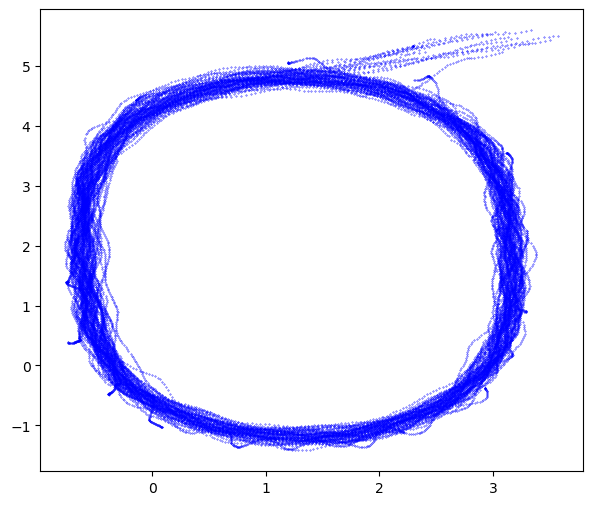

In [18]:
for file in files:
    file_name = os.path.splitext(file)[0]
    file_type = os.path.splitext(file)[1]  # extension of the data file
    # setup coordination system transformation
    data = process_data(data, exp_key)
    print(data)

    # plot the transformed trajectories
    fig = plt.figure(figsize=(7, 6))
    plt.plot(data[:, 2], data[:, 3], "bo", markersize=0.3)

In [ ]:
### Apply the transformation straight to the data